In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading MNIST Data from Tensorflow.Keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#Use Grayscale Normalization-reduces effect of illumination differences 
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train normalized shape: ", x_train.shape)
print("x_test normalized shape: ", x_test.shape)

x_train normalized shape:  (60000, 28, 28)
x_test normalized shape:  (10000, 28, 28)


In [4]:
# Reshaping 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print("x_train reshaped: ", x_train.shape)
print("x_test reshaped: ", x_test.shape)


x_train reshaped:  (60000, 28, 28, 1)
x_test reshaped:  (10000, 28, 28, 1)


In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(60000, 10)

In [6]:
#Spliting data into training and test sets. 80% training, 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20, random_state=2)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (48000, 28, 28, 1)
x_test shape (12000, 28, 28, 1)
y_train shape (48000, 10)
y_test shape (12000, 10)


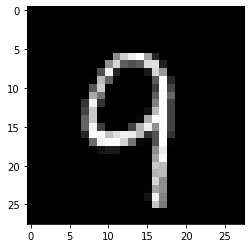

In [7]:
#Examples
plt.imshow(x_train[10][:,:,0],cmap='gray')
plt.show()

## Creating the CNN





In [8]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [9]:
#Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [10]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [11]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [12]:
# Fit the model
cnn_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size= 250),
                              epochs = 10, validation_data = (x_test, y_test), 
                              steps_per_epoch=x_train.shape[0] // 250)

Epoch 1/10
192/192 [==============================] - 13s 59ms/step - loss: 1.4803 - accuracy: 0.4876 - val_loss: 0.1698 - val_accuracy: 0.9542
Epoch 2/10
192/192 [==============================] - 11s 56ms/step - loss: 0.4112 - accuracy: 0.8701 - val_loss: 0.1033 - val_accuracy: 0.9707
Epoch 3/10
192/192 [==============================] - 11s 57ms/step - loss: 0.2905 - accuracy: 0.9100 - val_loss: 0.0817 - val_accuracy: 0.9762
Epoch 4/10
192/192 [==============================] - 11s 57ms/step - loss: 0.2414 - accuracy: 0.9256 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoch 5/10
192/192 [==============================] - 11s 56ms/step - loss: 0.2074 - accuracy: 0.9347 - val_loss: 0.0604 - val_accuracy: 0.9809
Epoch 6/10
192/192 [==============================] - 11s 58ms/step - loss: 0.1866 - accuracy: 0.9415 - val_loss: 0.0568 - val_accuracy: 0.9818
Epoch 7/10
192/192 [==============================] - 11s 56ms/step - loss: 0.1698 - accuracy: 0.9472 - val_loss: 0.0515 - val_accuracy:

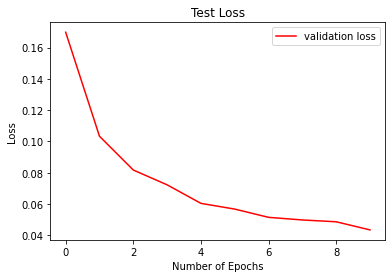

In [13]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(cnn_history.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

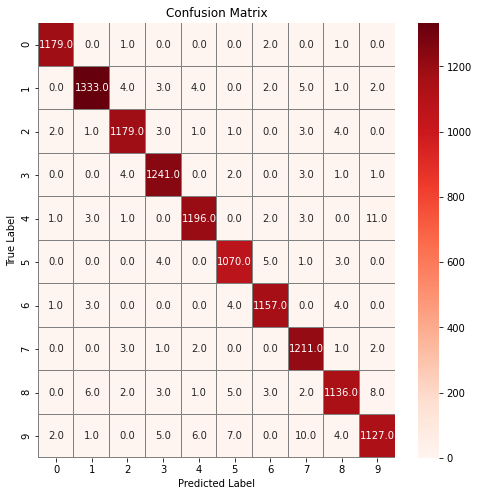

In [14]:
# confusion matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model.predict(x_test)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()